# Финальный Проект: Анализ оттока клиентов банка «Метанпром»

# Материалы
* Презентация - https://drive.google.com/file/d/10BEL970F96DoQ4egf9qnWHy07WS1uKdV/view?usp=share_link
* Дашборд - https://public.tableau.com/views/_16806142669710/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

Цель: Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка, предложить рекомендации для удержания клиентов по сегментам.

Задачи: 
- Провести исследовательский анализ данных, включающий исследование корреляций и портретов клиентов
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверить статистические гипотезы:  
    Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.  
    Сформулировать и проверить статистическую гипотезу относительно представленных данных
- Сделать выводы о том, какие признаки стратегическим образом влияют на отток и какие значения признаков или интервалы этих значений связаны с оттоком.
- Выделить не мелкие, но компактные и высокоточные сегменты, приоритезировать их
- Дать конкретные рекомендации по приоритетным сегментам
- По итогам исследования подготовить презентацию.
- Составить дашборд по полученным в ходе исследования данным

Описание датасета

* Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.
* Данные находятся в файле bank_dataset.csv

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### Выгрузка данных и ознакомление с ними

In [221]:
#math
import pandas as pd
import datetime as dt
import numpy as np
import statistics
from scipy import stats as st

#visual
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

#errors
pd.options.mode.chained_assignment = None

In [222]:
try:
    data = pd.read_csv(r'D:\Main\Yandex Practicum\Y.Anal\Final project - banks\bank_dataset.csv')
except:
    print('Файл не найден')

In [223]:
data

userid  score            City Gender  Age  Objects    Balance  \
0     15677338    619       Ярославль      Ж   42        2        NaN   
1     15690047    608         Рыбинск      Ж   41        1   83807.86   
2     15662040    502       Ярославль      Ж   42        8  159660.80   
3     15744090    699       Ярославль      Ж   39        1        NaN   
4     15780624    850         Рыбинск      Ж   43        2  125510.82   
...        ...    ...             ...    ...  ...      ...        ...   
9995  15648965    771       Ярославль      М   39        5        NaN   
9996  15612628    516       Ярославль      М   35       10   57369.61   
9997  15627268    709       Ярославль      Ж   36        7        NaN   
9998  15725091    772  Ростов Великий      М   42        3   75075.31   
9999  15671055    792       Ярославль      Ж   28        4  130142.79   

      Products  CreditCard  Loyalty  estimated_salary  Churn  
0            1           1        1         101348.88      1  
1            1           0        1         112542.58      0  
2            3           1        0         113931.57      1  
3            2           0        0          93826.63      0  
4            1           1        1          79084.10      0  
...        ...         ...      ...               ...    ...  
9995         2           1        0          96270.64      0  
9996         1           1        1         101699.77      0  
9997         1           0        1          42085.58      1  
9998         2           1        0          92888.52      1  
9999         1           1        0          38190.78      0  

[10000 rows x 12 columns]

### Подготовка данных

#### Анализ типов данных

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [225]:
data.columns= data.columns.str.lower()
data

userid  score            city gender  age  objects    balance  \
0     15677338    619       Ярославль      Ж   42        2        NaN   
1     15690047    608         Рыбинск      Ж   41        1   83807.86   
2     15662040    502       Ярославль      Ж   42        8  159660.80   
3     15744090    699       Ярославль      Ж   39        1        NaN   
4     15780624    850         Рыбинск      Ж   43        2  125510.82   
...        ...    ...             ...    ...  ...      ...        ...   
9995  15648965    771       Ярославль      М   39        5        NaN   
9996  15612628    516       Ярославль      М   35       10   57369.61   
9997  15627268    709       Ярославль      Ж   36        7        NaN   
9998  15725091    772  Ростов Великий      М   42        3   75075.31   
9999  15671055    792       Ярославль      Ж   28        4  130142.79   

      products  creditcard  loyalty  estimated_salary  churn  
0            1           1        1         101348.88      1  
1            1           0        1         112542.58      0  
2            3           1        0         113931.57      1  
3            2           0        0          93826.63      0  
4            1           1        1          79084.10      0  
...        ...         ...      ...               ...    ...  
9995         2           1        0          96270.64      0  
9996         1           1        1         101699.77      0  
9997         1           0        1          42085.58      1  
9998         2           1        0          92888.52      1  
9999         1           1        0          38190.78      0  

[10000 rows x 12 columns]

In [226]:
data = data.rename(columns={'userid': 'user_id','creditcard': 'credit_card'})

#### Анализ дубликатов

In [227]:
data.duplicated().sum()

0

In [228]:
data['user_id'].duplicated().sum()

0

#### Анализ пропусков

In [229]:
data.isna().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

Пропуски в балансе логично было бы заполнить в соответствии с оценкой зарплаты клиента. Разделим зарплаты на группы: среднюю низкую и всокую. Пропуски для каждой категории заполним средним значением баланса для данной категории.

In [230]:
data['income'] = 'dummie'

In [231]:
print(data['balance'].min())
print(data['balance'].max())
print(data['balance'].median())

3768.69
250898.09
119839.69


Шаг разделения на группы 80 000

In [232]:
for ind in range(len(data['estimated_salary'])):
    if data['estimated_salary'][ind] <= 80000:
        data['income'][ind] = 'low'
    elif 160000 >= data['estimated_salary'][ind] > 80000:
        data['income'][ind] = 'medium'
    else:
        data['income'][ind] = 'high'

Проверяем сколько групп получилось

In [233]:
data['income'].nunique()

3

In [234]:
for l in data['income'].unique():
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в data['income'] текущая группа (l) и есть пропуски в balance 
    data.loc[(data['income'] == l) & (data['balance'].isna()), 'balance'] = \
    data.loc[(data['income'] == l), 'balance'].mean()
    # и записываем в них среднее значение balance среди строк с текущей группой (l)

# проверяем, что все пропуски заполнены
print(data['balance'].isna().sum())

0


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
 12  income            10000 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Посмотрим на пропуски в разрезе городов

In [236]:
data['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

In [237]:
data['city'].isna().sum()

0

#### Перекодирование данных в бинарный формат для корреляционного исследования

Для того, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченным, можно применить one-hot кодирование, проще всего это сделать при помощи pandas.get_dummies. Чтобы при этом не потерять оригинальный столбец, стоит сделать его копию и использовать параметр columns (чтобы перекодированию подвергся или подверглись только те столбцы, которые нам нужно перекодировать).

In [238]:
data['sex'] = data['gender']

In [239]:
data = pd.get_dummies(data, columns = ['gender'], drop_first = True)

In [240]:
data = data.rename(columns={'gender_М': 'gender_m'})

In [241]:
data.head()

user_id  score       city  age  objects      balance  products  \
0  15677338    619  Ярославль   42        2  120183.2753         1   
1  15690047    608    Рыбинск   41        1   83807.8600         1   
2  15662040    502  Ярославль   42        8  159660.8000         3   
3  15744090    699  Ярославль   39        1  120183.2753         2   
4  15780624    850    Рыбинск   43        2  125510.8200         1   

   credit_card  loyalty  estimated_salary  churn  income sex  gender_m  
0            1        1         101348.88      1  medium   Ж         0  
1            0        1         112542.58      0  medium   Ж         0  
2            1        0         113931.57      1  medium   Ж         0  
3            0        0          93826.63      0  medium   Ж         0  
4            1        1          79084.10      0     low   Ж         0

In [242]:
data['location'] = data['city']

In [243]:
data = pd.get_dummies(data, columns = ['city'], drop_first = False)

In [244]:
data = data.rename(columns={'city_Ростов Великий': 'rostov', 'city_Рыбинск': 'ribinsk', 'city_Ярославль': 'yaroslavl' })

In [245]:
data.head()

user_id  score  age  objects      balance  products  credit_card  loyalty  \
0  15677338    619   42        2  120183.2753         1            1        1   
1  15690047    608   41        1   83807.8600         1            0        1   
2  15662040    502   42        8  159660.8000         3            1        0   
3  15744090    699   39        1  120183.2753         2            0        0   
4  15780624    850   43        2  125510.8200         1            1        1   

   estimated_salary  churn  income sex  gender_m   location  rostov  ribinsk  \
0         101348.88      1  medium   Ж         0  Ярославль       0        0   
1         112542.58      0  medium   Ж         0    Рыбинск       0        1   
2         113931.57      1  medium   Ж         0  Ярославль       0        0   
3          93826.63      0  medium   Ж         0  Ярославль       0        0   
4          79084.10      0     low   Ж         0    Рыбинск       0        1   

   yaroslavl  
0          1  
1          0  
2          1  
3          1  
4          0

Исправим тип данных в нескольких колонках с бинарным типом

In [246]:
data.credit_card = data.credit_card.astype('bool')

In [247]:
data.loyalty = data.loyalty.astype('bool')

In [248]:
data.churn = data.churn.astype('bool')

In [249]:
data.to_csv('D:\Main\Yandex Practicum\Y.Anal\Final project - banks/out.csv') 

#### Выделим данные только с ушедшими клиентами для более поздних этапов анализа

In [250]:
churned = data[data['churn']==1]

### Исследовательский анализ данных

#### Распределение клиентов (средние, медианы, max/min, абсюлютное количество по категориям, распределение отточных клиентов)

Посчитаем уникальных клиентов

In [251]:
data['user_id'].nunique()

10000

Всего 10 000 уникальных пользователей, как и строк в датасете

Посмотрим на долю владельцев кредитной карты

In [252]:
data

user_id  score  age  objects        balance  products  credit_card  \
0     15677338    619   42        2  120183.275300         1         True   
1     15690047    608   41        1   83807.860000         1        False   
2     15662040    502   42        8  159660.800000         3         True   
3     15744090    699   39        1  120183.275300         2        False   
4     15780624    850   43        2  125510.820000         1         True   
...        ...    ...  ...      ...            ...       ...          ...   
9995  15648965    771   39        5  120183.275300         2         True   
9996  15612628    516   35       10   57369.610000         1         True   
9997  15627268    709   36        7  119752.279481         1        False   
9998  15725091    772   42        3   75075.310000         2         True   
9999  15671055    792   28        4  130142.790000         1         True   

      loyalty  estimated_salary  churn  income sex  gender_m        location  \
0        True         101348.88   True  medium   Ж         0       Ярославль   
1        True         112542.58  False  medium   Ж         0         Рыбинск   
2       False         113931.57   True  medium   Ж         0       Ярославль   
3       False          93826.63  False  medium   Ж         0       Ярославль   
4        True          79084.10  False     low   Ж         0         Рыбинск   
...       ...               ...    ...     ...  ..       ...             ...   
9995    False          96270.64  False  medium   М         1       Ярославль   
9996     True         101699.77  False  medium   М         1       Ярославль   
9997     True          42085.58   True     low   Ж         0       Ярославль   
9998    False          92888.52   True  medium   М         1  Ростов Великий   
9999    False          38190.78  False     low   Ж         0       Ярославль   

      rostov  ribinsk  yaroslavl  
0          0        0          1  
1          0        1          0  
2          0        0          1  
3          0        0          1  
4          0        1          0  
...      ...      ...        ...  
9995       0        0          1  
9996       0        0          1  
9997       0        0          1  
9998       1        0          0  
9999       0        0          1  

[10000 rows x 17 columns]

In [253]:
cr = data.groupby(['credit_card', 'sex'])[['user_id']].count()
cr.columns = ['total_count']
cr = cr.reset_index().sort_values(by='total_count', ascending=False)
cr['credit_card'] = cr['credit_card'].map({True: 'Есть карта', False: 'Нет карты'})
cr

credit_card sex  total_count
3  Есть карта   М         3863
2  Есть карта   Ж         3192
1   Нет карты   М         1594
0   Нет карты   Ж         1351

In [254]:
# строим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=cr['credit_card'], # указываем значения, которые появятся на метках сегментов
                             values=cr['total_count'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Количество клиентов с кредитной картой', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Наличие кредитной карты',
                                    showarrow=False)])
fig.show() # выводим график

У 70% из 10 к. клиентов есть кредитная карта

Оценим наличие кредитных карт у ушедших клиентов

In [255]:
crc = churned.groupby(['credit_card', 'sex'])[['user_id']].count()
crc.columns = ['total_count']
crc = crc.reset_index().sort_values(by='total_count', ascending=False)
crc['credit_card'] = crc['credit_card'].map({True: 'Есть карта', False: 'Нет карты'})
crc

credit_card sex  total_count
2  Есть карта   Ж          795
3  Есть карта   М          629
0   Нет карты   Ж          344
1   Нет карты   М          269

Аномалий нет

In [256]:
# строим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=crc['credit_card'], # указываем значения, которые появятся на метках сегментов
                             values=crc['total_count'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Количество клиентов с кредитной картой среди ушедших', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Наличие кредитной карты',
                                    showarrow=False)])
fig.show() # выводим график

У ушедших клиентов распределение аналогичное

Посмотрим на долю активных клиентов

In [257]:
lo = data.groupby('loyalty')[['user_id']].count()
lo.columns = ['total_count']
lo = lo.reset_index().sort_values(by='total_count', ascending=False)
lo['loyalty'] = lo['loyalty'].map({True: 'Активен', False: 'Не активен'})
lo

loyalty  total_count
1     Активен         5151
0  Не активен         4849

In [258]:
# строим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=lo['loyalty'], # указываем значения, которые появятся на метках сегментов
                             values=lo['total_count'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Количество активных клиентов', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Активность',
                                    showarrow=False)])
fig.show() # выводим график

Половина из 10к. клиентов является активной

Посмотрим на долю ушедших клиентов

In [259]:
ch = data.groupby('churn')[['user_id']].count()
ch.columns = ['total_count']
ch = ch.reset_index().sort_values(by='total_count', ascending=False)
ch['churn'] = ch['churn'].map({True: 'Ушел', False: 'Не ушел'})
ch

churn  total_count
0  Не ушел         7963
1     Ушел         2037

In [260]:
# строим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=ch['churn'], # указываем значения, которые появятся на метках сегментов
                             values=ch['total_count'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Количество ушедших клиентов', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Статус',
                                    showarrow=False)])
fig.show() # выводим график

20% из 10к. клиентов ушли

Посчитаем количество клиентов разного пола

In [261]:
pp = data.groupby('sex')[['user_id']].count()
pp.columns = ['total_count']
pp = pp.reset_index().sort_values(by='total_count', ascending=False)
pp

sex  total_count
1   М         5457
0   Ж         4543

In [262]:
# строим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=pp['sex'], # указываем значения, которые появятся на метках сегментов
                             values=pp['total_count'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Количество клиентов разного пола', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Пол',
                                    showarrow=False)])
fig.show() # выводим график

В датасете 5457 мужчин и 4543 женщин. В долях 55% и 45% соответственно

Посчитаем количество клиентов разного пола среди ушедших

In [263]:
ppc = churned.groupby('sex')[['user_id']].count()
ppc.columns = ['total_count']
ppc = ppc.reset_index().sort_values(by='total_count', ascending=False)
ppc

sex  total_count
0   Ж         1139
1   М          898

In [264]:
# строим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=ppc['sex'], # указываем значения, которые появятся на метках сегментов
                             values=ppc['total_count'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Количество клиентов разного пола среди ушедших клиентов', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Пол',
                                    showarrow=False)])
fig.show() # выводим график

Женщины уходят чаще мужчин. Среди ушедших 56% женщин, 44% мужчин. С учетом того, что в изначальной выборке разделение было в пользу мужчин, эффект становится еще более значимым. Посмотрим на доли ушеддших в разрезе полов

In [265]:
jojo=pp.merge(ppc, on='sex')
jojo.columns = ['sex', 'total', 'churned']
jojo['ratio']=round(jojo['churned']/jojo['total']*100, 2)
jojo

sex  total  churned  ratio
0   М   5457      898  16.46
1   Ж   4543     1139  25.07

Более 25% женщин в датасете отточные (каждая 4 клиентка ушла). У мужчин показатель ниже - 16.5% (каждый 6 клиент ушел)

Посмотрим распределение клиентов по возрасту

In [266]:
old = data.groupby('age')[['user_id']].count()
old.columns = ['total_count']
old = old.reset_index().sort_values(by='total_count', ascending=False)
old.head()

age  total_count
19   37          478
20   38          477
17   35          474
18   36          456
16   34          447

In [267]:
# строим столбчатую диаграмму 
fig = px.bar(old, # загружаем данные и заново их сортируем
             x='age', # указываем столбец с данными для оси X
             y='total_count' # указываем столбец с данными для оси Y
            )
# оформляем график
fig.update_layout(title='Число клиентов разных возрастов',
                   xaxis_title='Возраст',
                   yaxis_title='Число клиентов')
fig.show() # выводим график

In [268]:
data['age'].median()

37.0

In [269]:
data['age'].min()

18

In [270]:
data['age'].max()

92

Чаще всего клиентами банка являются люди от 30 до 45 лет. Медианное значение возраста 37 лет, самому старому клиенту 92, самому молодому 18

Посчитаем количество клиентов разного возраста среди ушедших

In [271]:
oldc = churned.groupby('age')[['user_id']].count()
oldc.columns = ['total_count']
oldc = oldc.reset_index().sort_values(by='total_count', ascending=False)
oldc.head()

age  total_count
28   46           91
22   40           89
25   43           88
27   45           87
30   48           80

In [272]:
# строим столбчатую диаграмму 
fig = px.bar(oldc, # загружаем данные и заново их сортируем
             x='age', # указываем столбец с данными для оси X
             y='total_count' # указываем столбец с данными для оси Y
            )
# оформляем график
fig.update_layout(title='Число клиентов разных возрастов',
                   xaxis_title='Возраст',
                   yaxis_title='Число клиентов')
fig.show() # выводим график

In [273]:
churned['age'].median()

45.0

Медианный возраст для уходящих выше чем для выборки в целом: 45 лет.

Посмотрим из каких городов больше клиентов

In [274]:
donde = data.groupby('location')[['user_id']].count()
donde.columns = ['total_count']
donde = donde.reset_index().sort_values(by='total_count', ascending=False)
donde

location  total_count
2       Ярославль         5014
0  Ростов Великий         2509
1         Рыбинск         2477

In [275]:
# строим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=donde['location'], # указываем значения, которые появятся на метках сегментов
                             values=donde['total_count'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Количество клиентов по городам', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Город',
                                    showarrow=False)])
fig.show() # выводим график

Больше всего клиентов из Ярославля (50% выборки), на Ростов и Рыбицк приходится по 25%

Посмотрим из каких городов уходящие клиенты

In [276]:
dondec = churned.groupby('location')[['user_id']].count()
dondec.columns = ['total_count']
dondec = dondec.reset_index().sort_values(by='total_count', ascending=False)
dondec

location  total_count
0  Ростов Великий          814
2       Ярославль          810
1         Рыбинск          413

In [277]:
# строим диаграмму с сегментами
fig = go.Figure(data=[go.Pie(labels=dondec['location'], # указываем значения, которые появятся на метках сегментов
                             values=dondec['total_count'], # указываем данные, которые отобразятся на графике
                             pull = [0.1, 0])]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Количество ушедших клиентов по городам', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Город',
                                    showarrow=False)])
fig.show() # выводим график

Почти  80% отточных клиентов всего датасета приходится на клиентов из Ярославля и Ростова. На рыбинск приходится 20%. Следует в превую очередь обратить внимание на Ростов, затем на Ярославль, затем на Рыбинск. Но посмотрим доли отточных клиентов внутри каждого из городов. 

In [278]:
joint=donde.merge(dondec, on='location')
joint.columns = ['location', 'total', 'churned']
joint['ratio']=round(joint['churned']/joint['total']*100, 2)
joint

location  total  churned  ratio
0       Ярославль   5014      810  16.15
1  Ростов Великий   2509      814  32.44
2         Рыбинск   2477      413  16.67

Почти 33% клиентов из Ростова оказались отточными. В Ярославле и Рыбинске отток около 16%

Построим графики распределения

In [279]:
data.boxplot(column='age', figsize=(3,10),grid=True, showmeans=True)
plt.title('Распределение возраста клиентов')
plt.ylabel('Возраст')
plt.grid(True)
plt.yticks(np.arange(0, 95, 2))
plt.ylim((15,95));

Как мы уже выяснили, чаще всего клиентами банка являются люди от 30 до 45 лет. Медианное значение 37 лет. В межквартильный размах (50% выборки) входят люди от 32 до 44 лет. Так же, есть много выбросов: людей старше 62 лет, которые не входят в диаграмму размаха. 

Сравним возраст у оставшихся и ушедших клиентов

In [280]:
fig = px.box(data, x="churn", y="age", title="Распределение возраста для оставшихся и ушедших клиентов")
fig.show()

Отточные клиенты обычно старше неотточных. Медианный возраст 45 лет

In [281]:
data.boxplot(column='score', figsize=(3,10),grid=True, showmeans=True)
plt.title('Распределение баллов скоринга')
plt.ylabel('Баллы')
plt.grid(True)
plt.yticks(np.arange(300, 900, 40));
#plt.ylim((15,95));

In [282]:
data['score'].median()

652.0

В межквартильный размах (50% выборки) входят люди у которых баллы скоринга находятся в диапазоне от 580 до 720. Видно много выбросов от 340 до 380 баллов. Медианное значение 652 балла

Сравним баллы скоринга у оставшихся и ушедших клиентов

In [283]:
fig = px.box(data, x="churn", y="score", title="Распределение баллов скоринга для оставшихся и ушедших клиентов")
fig.show()

Баллы скоринга идентичны у отточных и неооточных клиентов. Однако, среди отточных клиентов есть люди с баллами ниже 400. Возможно, это повлияло на их уход.

In [284]:
data.boxplot(column='objects', figsize=(3,10),grid=True, showmeans=True)
plt.title('Распределение числа объектов собственности клиентов')
plt.ylabel('Число объектов')
plt.grid(True)
plt.yticks(np.arange(0, 11, 1));
#plt.ylim((15,95));

В межквартильный размах (50% выборки) входят люди с числом объектов от 3 до 7, с медианным значением 5. 

Сравним число объектов у оставшихся и ушедших клиентов

In [285]:
fig = px.box(data, x="churn", y="objects", title="Распределение числа объектов для оставшихся и ушедших клиентов")
fig.show()

У ушедших клиентов межквартильный размах больше: от 2 до 8 объектов недвижимости

In [286]:
data.boxplot(column='balance', figsize=(3,10),grid=True, showmeans=True)
plt.title('Распределение балансов клиентов')
plt.ylabel('Баланс')
plt.grid(True)
plt.yticks(np.arange(0, 255000, 10000));
#plt.ylim((15,95));

В межквартильный размах (50% выборки) входят люди с балансом от 100 к. до 140 к. на счету. Заметны выбросы: клиенты с балансом от 0 до 40 к. и с балансом от 200 к. до 250 к. Медианное значение 120 к.

Сравним распределение баланса у оставшихся и ушедших клиентов

In [287]:
fig = px.box(data, x="churn", y="balance", title="Распределение баланса для оставшихся и ушедших клиентов")
fig.show()

У отточных клиентов распределение баланса более неоднородно. Минимальный и максимальный баланс дальше друг от друга чем у неотточных клиентов, наблюдается больше выбросов и более широкие квартили.

In [288]:
data.boxplot(column='products', figsize=(3,10),grid=True, showmeans=True)
plt.title('Распределение числа продуктов у клиентов')
plt.ylabel('Число продуктов')
plt.grid(True)
#plt.yticks(np.arange(0, 95, 5))
#plt.ylim((15,95));

В межквартильный размах (50% выборки) входят люди с числом продуктов от 1 до 2. В выбросах можно наблюдать клиентов с 4 продуктами. Нет клиентов с 0 продуктов, что логично. Медианное значение 1

Сравним число продуктов у оставшихся и ушедших клиентов

In [289]:
fig = px.box(data, x="churn", y="products", title="Распределение числа продуктов для оставшихся и ушедших клиентов")
fig.show()

Распределение числа продуктов для отточных клиентов схожее, однако медиана для оставшихся равняется 2, в то время как медиана для ушедших равна 1. Заметен выброс (4 продукта) для одного ушедшего клиента.

In [290]:
data.boxplot(column='estimated_salary', figsize=(3,10), grid=True, showmeans=True)
plt.title('Распределение оценки доходов')
plt.ylabel('Оценка дохода')
plt.grid(True)
#plt.yticks(np.arange(0, 95, 5))
#plt.ylim((15,95));

В межквартильный размах (50% выборки) входят люди с доходом от 50 к. до 150 к. с медианой 100 к.

Сравним оценку доходов у оставшихся и ушедших клиентов

In [291]:
fig = px.box(data, x="churn", y="estimated_salary", title="Распределение оценки доходов для оставшихся и ушедших клиентов")
fig.show()

Доходы ушедших совсем незначительно выше доходов оставшихся. На это скорее всего повлияли выбросы.

Вывод по общему портрету аудитории
* Всего 10 000 уникальных пользователей
* 70% имеют кредитную карту
* Половина из 10к. клиентов является активной
* В датасете 5457 мужчин и 4543 женщин. В долях 55% и 45% соответственно
* Чаще всего клиентами банка являются люди от 30 до 45 лет. Медианное значение возраста 37 лет, самому старому клиенту 92, самому молодому 18
* В межквартильный размах (50% выборки) входят люди от 32 до 44 лет. Так же, есть много выбросов: людей старше 62 лет, которые не входят в диаграмму размаха. 
* Больше всего клиентов из Ярославля (50% выборки), на Ростов и Рыбицк приходится по 25%
* В межквартильный размах (50% выборки) входят люди у которых баллы скоринга находятся в диапазоне от 580 до 720. Видно много выбросов от 340 до 380 баллов. Медианное значение 652 балла
* В межквартильный размах (50% выборки) входят люди с числом объектов от 3 до 7, с медианным значением 5. 
* В межквартильный размах (50% выборки) входят люди с балансом от 100 к. до 140 к. на счету. Заметны выбросы: клиенты с балансом от 0 до 40 к. и с балансом от 200 к. до 250 к. Медианное значение 120 к.
* В межквартильный размах (50% выборки) входят люди с числом продуктов от 1 до 2. В выбросах можно наблюдать клиентов с 4 продуктами. Нет клиентов с 0 продуктов, что логично. Медианное значение 1
* В межквартильный размах (50% выборки) входят люди с доходом от 50 к. до 150 к. с медианой 100 к.

#### Портрет ушедших клиентов и их сравнение

* Всего 2037 отточных уникальных пользователей (20% всей выборки)
* 70% имеют кредитную карту
* Отточные клиенты: 898 мужчин и 1139 женщин. В долях 44% и 56% соответственно
* Более 25% женщин изначального датасета отточные (каждая 4 клиентка ушла). У мужчин показатель ниже - 16.5% (каждый 6 клиент ушел)
* Медианный возраст для уходящих выше чем для выборки в целом: 45 лет
* 80% отточных клиентов приходится на людей из Ярославля и в Ростова. На рыбинск приходится 20%.
* Оценка по каждому городу отдельно: Почти 33% клиентов из Ростова оказались отточными. В Ярославле и Рыбинске отток около 16%
* Баллы скоринга идентичны у отточных и неотточных клиентов. Однако, среди отточных клиентов есть люди с баллами ниже 400. Возможно, это повлияло на их уход.
* У ушедших клиентов межквартильный размах больше: от 2 до 8 объектов недвижимости
* У отточных клиентов распределение баланса более неоднородно чем у оставшихся. Минимальный и максимальный баланс дальше друг от друга чем у неотточных клиентов, наблюдается больше выбросов и более широкие квартили.
* Распределение числа продуктов для отточных клиентов схожее, однако медиана для оставшихся равняется 2, в то время как медиана для ушедших равна 1. Заметен выброс (4 продукта) для одного ушедшего клиента.
* Доходы ушедших совсем незначительно выше доходов оставшихся. На это скорее всего повлияли выбросы.

#### Корреляционный анализ (матрица корреляции)

In [292]:
data.head()

user_id  score  age  objects      balance  products  credit_card  loyalty  \
0  15677338    619   42        2  120183.2753         1         True     True   
1  15690047    608   41        1   83807.8600         1        False     True   
2  15662040    502   42        8  159660.8000         3         True    False   
3  15744090    699   39        1  120183.2753         2        False    False   
4  15780624    850   43        2  125510.8200         1         True     True   

   estimated_salary  churn  income sex  gender_m   location  rostov  ribinsk  \
0         101348.88   True  medium   Ж         0  Ярославль       0        0   
1         112542.58  False  medium   Ж         0    Рыбинск       0        1   
2         113931.57   True  medium   Ж         0  Ярославль       0        0   
3          93826.63  False  medium   Ж         0  Ярославль       0        0   
4          79084.10  False     low   Ж         0    Рыбинск       0        1   

   yaroslavl  
0          1  
1          0  
2          1  
3          1  
4          0

In [293]:
cor = round(data.corr(),2)

In [294]:
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cbar=False).set(title ='Матрица корреляции');

По матрице корреляции можно сделать следующие выводы:
* Возраст имеет сильное положительное влияние на уход клиента (0.29). Чем старше клиент, тем больше вероятность его ухода
* Так же возраст имеет заметное положительное влияние на лояльность (0.09). Чем старше клиент, тем больше вероятность его лояльности
* Есть отрицательная зависимость между лояльностью и уходом (-0.15). Если клиент лоялен, то он скорее всего не уйдет
* Так же отрицательная зависимость есть между полом и уходом клиента (-0.1). Если клиент женщина, выше вероятность ее ухода
* Заметна сильная зависимость отточности в зависимости от города (Ростов +0.17, Ярославль -0.1). То есть, если человек из Ростова, то он с большей вероятностью бедет отточным. Если клиент из Ярославля, то он с большей вероятностью останется.

Следующие зависимости вполне могут быть погрешностью. Они незначимы
* Есть незначительная отрицательная зависисимость ухода от баллов скоринга (-0.03). Чем ниже баллы тем вероятнее уход
* Есть так же небольшая отрицательная зависимость между лояльностью и баллами скоринга (-0.026). Чем больше баллов скоринга тем меньше лояльность
* Небольшая отрицательная зависимость присутствует и у показателей числа продуктов и возраста (-0.03). Чем старше клиент, тем меньше продуктов
* Небольшая отрицательная зависимость есть между числом продуктов и уходом клиента. (-0.05). Чем больше продуктов, тем меньше вероятность ухода.
* Небольшая отрицательная зависимость есть между отточностью и локацией Рыбинск (-0.05). Если клиент из рыбинска, он скорее останется.

Оценим сегменты клиентов в различных разрезах

In [295]:
all_ch = data.pivot_table(index='age', values ='churn', aggfunc= 'mean')

In [296]:
men_ch = data.query('gender_m==1').pivot_table(index='age', values ='churn', aggfunc= 'mean')

In [297]:
women_ch = data.query('gender_m==0').pivot_table(index='age', values ='churn', aggfunc= 'mean')

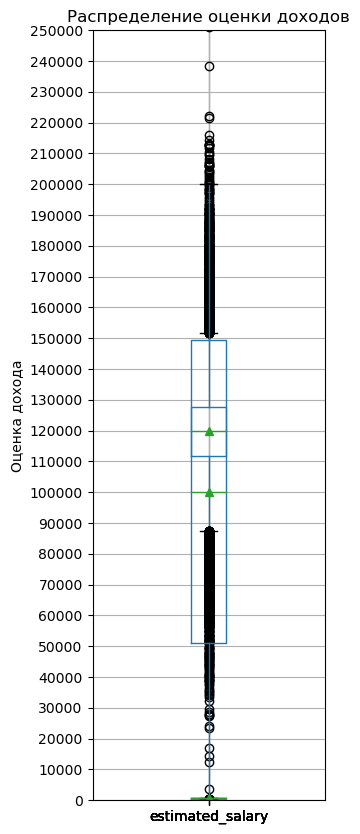

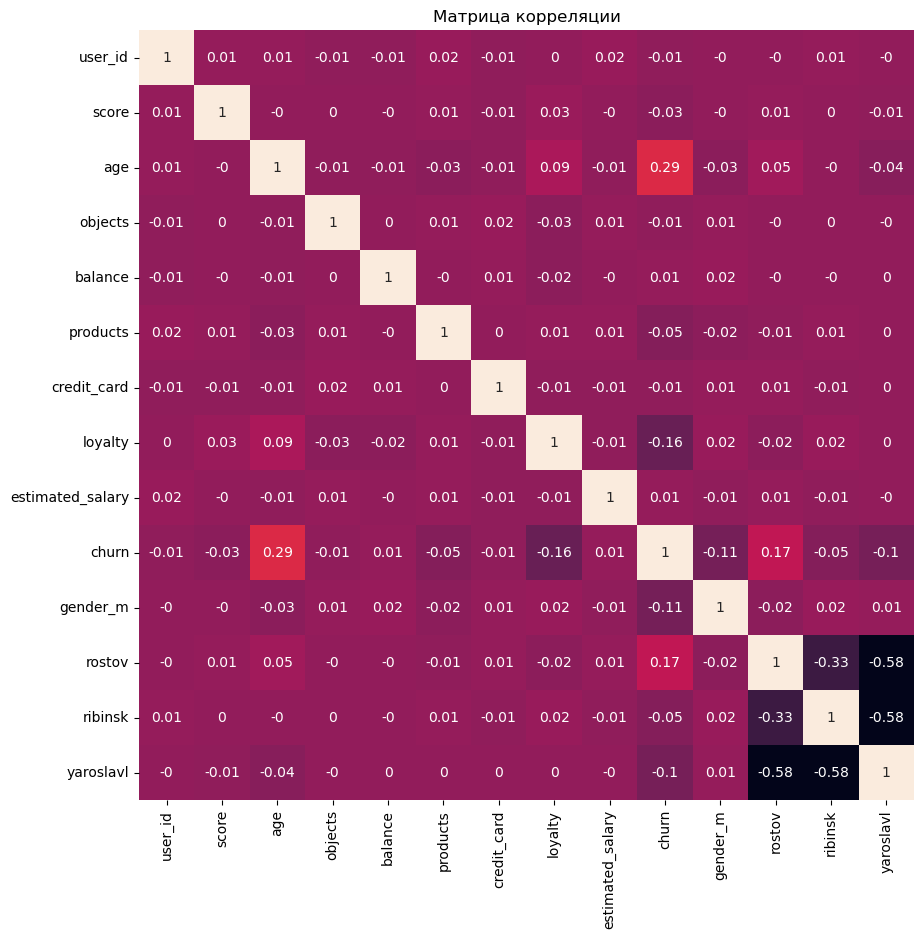

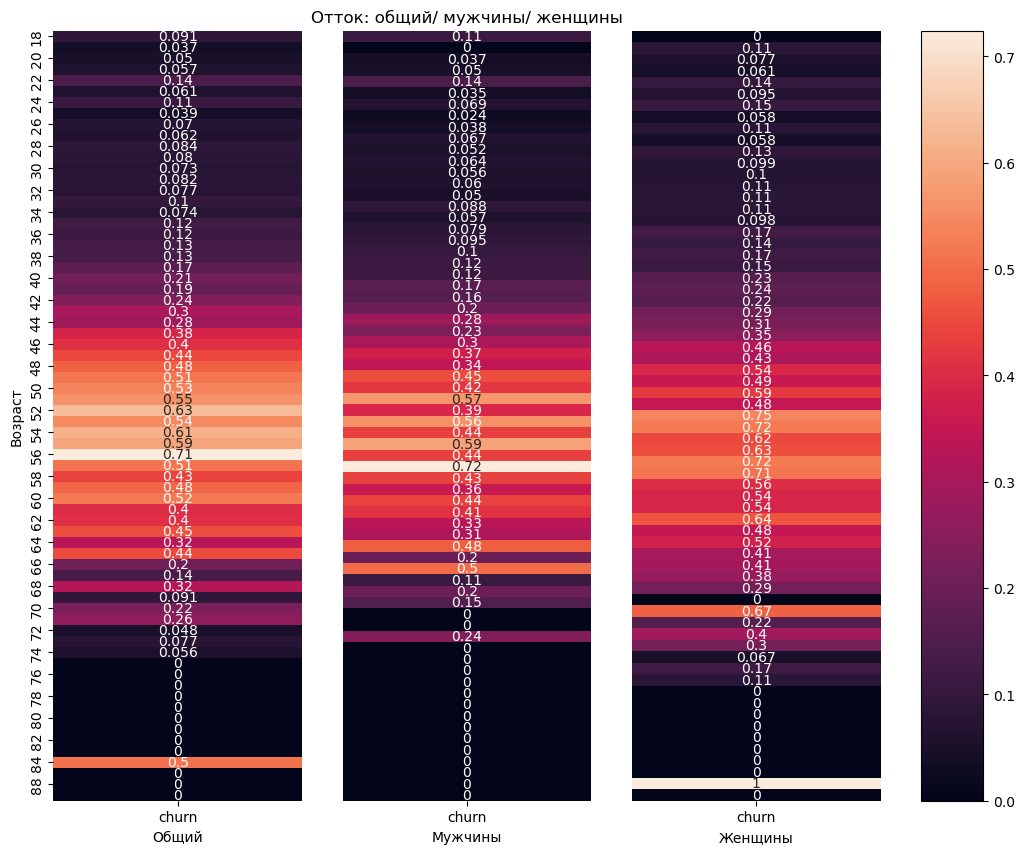

In [298]:

fig, axs = plt.subplots(ncols=4, figsize=(12, 10), gridspec_kw=dict(width_ratios=[4,4,4,1]))

sns.heatmap(all_ch, annot=True, cbar=False, ax=axs[0]).set(xlabel='Общий', ylabel='Возраст')
sns.heatmap(men_ch, annot=True, yticklabels=False, cbar=False, ax=axs[1]).set(title='Отток: общий/ мужчины/ женщины', xlabel='Мужчины', ylabel= None)
sns.heatmap(women_ch, annot=True, yticklabels=False, cbar=False, ax=axs[2]).set(xlabel='Женщины', ylabel= None)

fig.colorbar(axs[1].collections[0], cax=axs[3])

plt.show()

* По общим данным видно, что отток значительно усиливается в промежутке от 43 лет до 65. Особенно отточны келиенты 56 лет
* У мужчин отток наиболее выражен так же в промежутке от 43 лет до 65. Особенно отточны клиенты 56 лет
* У женщин отток наиболее выражен в промежутке от 42 лет до 71. Особенно отточны клиенты в 51 год

Добавим на хитмэпы срез по городам

In [299]:
men_ch_ro = data.query('rostov==1').query('gender_m==1').pivot_table(index='age', values ='churn', aggfunc= 'mean')
men_ch_ri = data.query('ribinsk==1').query('gender_m==1').pivot_table(index='age', values ='churn', aggfunc= 'mean')
men_ch_ya = data.query('yaroslavl==1').query('gender_m==1').pivot_table(index='age', values ='churn', aggfunc= 'mean')
women_ch_ro = data.query('rostov==1').query('gender_m==0').pivot_table(index='age', values ='churn', aggfunc= 'mean')
women_ch_ri = data.query('ribinsk==1').query('gender_m==0').pivot_table(index='age', values ='churn', aggfunc= 'mean')
women_ch_ya = data.query('yaroslavl==1').query('gender_m==0').pivot_table(index='age', values ='churn', aggfunc= 'mean')

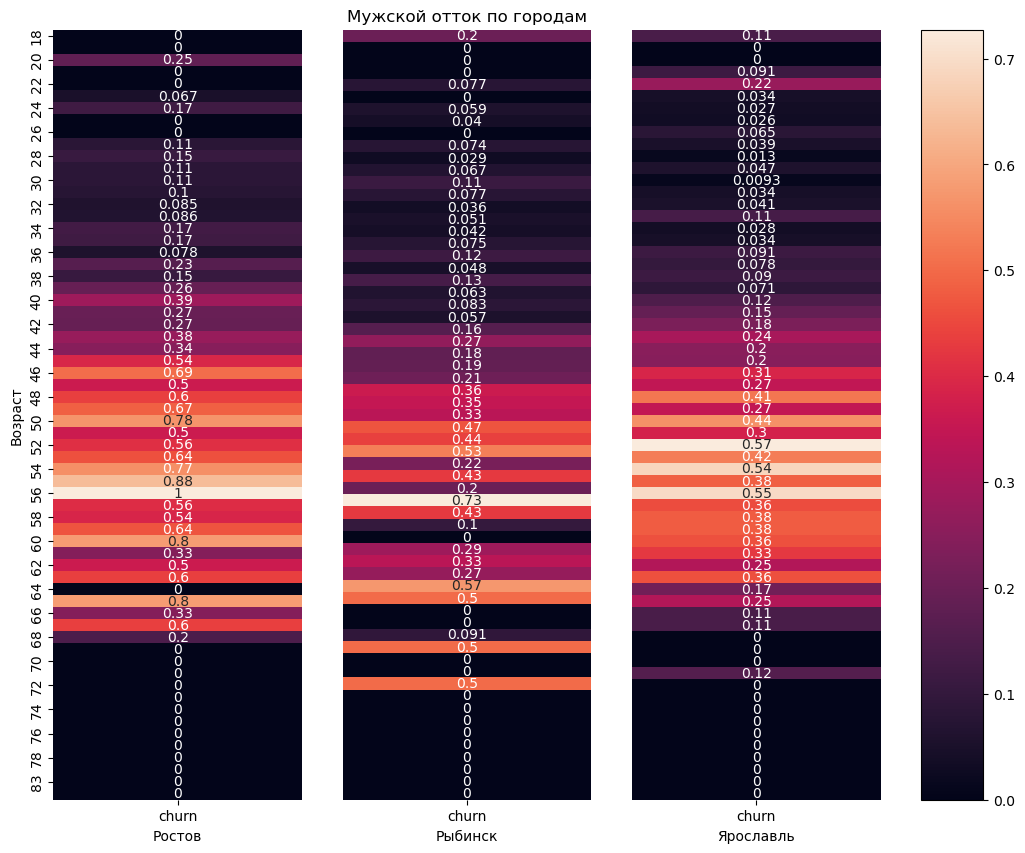

In [300]:

fig, axs = plt.subplots(ncols=4, figsize=(12, 10), gridspec_kw=dict(width_ratios=[4,4,4,1]))

sns.heatmap(men_ch_ro, annot=True, cbar=False, ax=axs[0]).set(xlabel='Ростов', ylabel='Возраст')
sns.heatmap(men_ch_ri, annot=True, yticklabels=False, cbar=False, ax=axs[1]).set(title='Мужской отток по городам', xlabel='Рыбинск', ylabel= None)
sns.heatmap(men_ch_ya, annot=True, yticklabels=False, cbar=False, ax=axs[2]).set(xlabel='Ярославль', ylabel= None)

fig.colorbar(axs[1].collections[0], cax=axs[3])

plt.show()

* В Ростове очень высокий уровень отточности для мужчин от 43 лет
* В Рыбинске особенно отточны мужчины от 47 до 58. А так же мужчины 64, 65, 69, 72 лет, но эти данные стоит сверить с количеством таких клиентов
* В Ярославле наиболее отточны мужчины от 46 и до 63

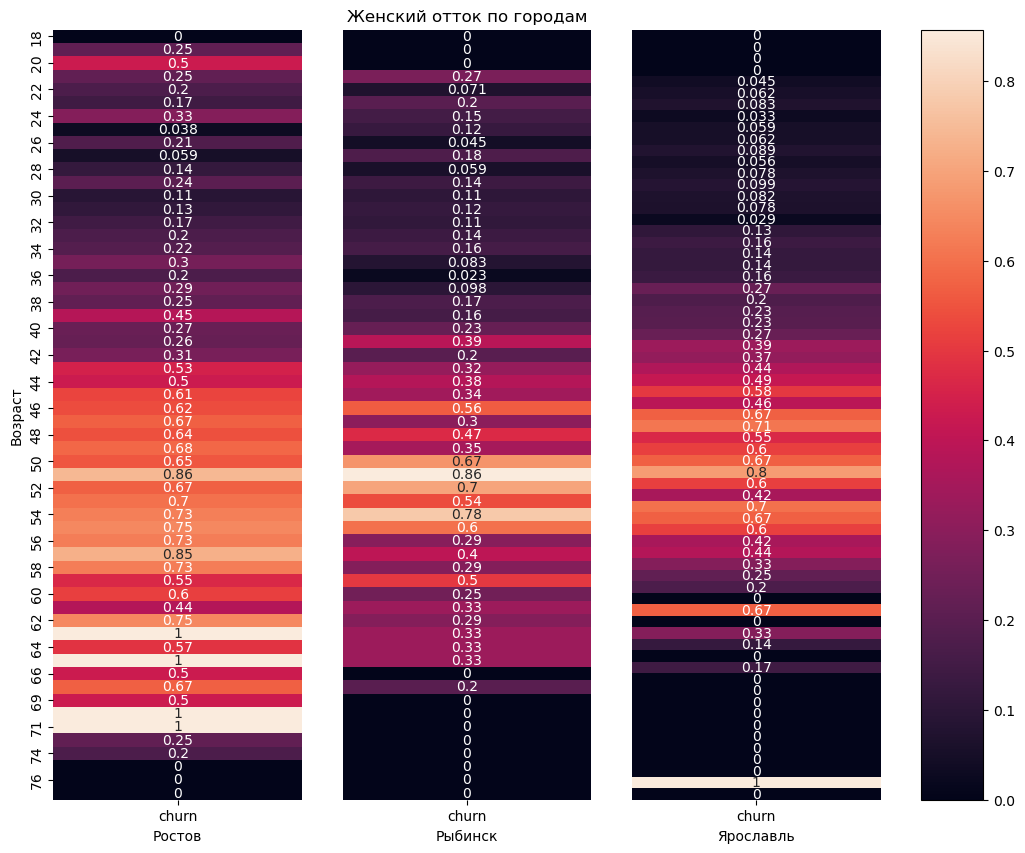

In [301]:

fig, axs = plt.subplots(ncols=4, figsize=(12, 10), gridspec_kw=dict(width_ratios=[4,4,4,1]))

sns.heatmap(women_ch_ro, annot=True, cbar=False, ax=axs[0]).set(xlabel='Ростов', ylabel='Возраст')
sns.heatmap(women_ch_ri, annot=True, yticklabels=False, cbar=False, ax=axs[1]).set(title='Женский отток по городам', xlabel='Рыбинск', ylabel= None)
sns.heatmap(women_ch_ya, annot=True, yticklabels=False, cbar=False, ax=axs[2]).set(xlabel='Ярославль', ylabel= None)

fig.colorbar(axs[1].collections[0], cax=axs[3])

plt.show()

* В Ростове очень высокий уровень отточности для женщин от 39 лет и до 71
* В Рыбинске особенно отточны женщины от 41 до 65
* В Ярославле наиболее отточны женщины от 41 и до 58, а так же женщины 61 и 63 лет (здесь тоже стоит проверить чило таких женщин)

Проверим число клиентов для некоторых возрастов

In [302]:
aged = data.query('gender_m==0').query('age==71') 
aged = aged.pivot_table(index = 'location', values = 'churn', aggfunc = {'mean', 'count'})
aged

count      mean
location                       
Ростов Великий      2  1.000000
Рыбинск             1  0.000000
Ярославль           7  0.142857

Видно, что чем выше возраст, тем меньше количество клиентов, что сильно искажает долю отточности.

Выделим наиболее проблемную группу по городам

In [303]:
problem = data.query('50<=age<=60').query('rostov==1') 
problem = problem.pivot_table(index = 'location', values = 'churn', aggfunc = 'mean')
problem

churn
location                
Ростов Великий  0.700348

В Ростове у клиентов 50-60 лет отточность 70%

In [304]:
problem = data.query('50<=age<=60').query('ribinsk==1') 
problem = problem.pivot_table(index = 'location', values = 'churn', aggfunc = 'mean')
problem

churn
location          
Рыбинск   0.452055

В Рыбинске у клиентов 50-60 лет отточность 45%

In [305]:
problem = data.query('50<=age<=60').query('yaroslavl==1') 
problem = problem.pivot_table(index = 'location', values = 'churn', aggfunc = 'mean')
problem

churn
location           
Ярославль  0.515294

В Ярославле у клиентов 50-60 лет отточность 52%

Во всех городах самый отточный возраст с 50 до 60 (65)

Вывод по исследовательскому анализу

Портрет всех клиентов 

* Всего 10 000 уникальных пользователей
* 70% имеют кредитную карту
* Половина из 10к. клиентов является активной
* В датасете 5457 мужчин и 4543 женщин. В долях 55% и 45% соответственно
* Чаще всего клиентами банка являются люди от 30 до 45 лет. Медианное значение возраста 37 лет, самому старому клиенту 92, самому молодому 18
* В межквартильный размах (50% выборки) входят люди от 32 до 44 лет. Так же, есть много выбросов: людей старше 62 лет, которые не входят в диаграмму размаха. 
* Больше всего клиентов из Ярославля (50% выборки), на Ростов и Рыбицк приходится по 25%
* В межквартильный размах (50% выборки) входят люди у которых баллы скоринга находятся в диапазоне от 580 до 720. Видно много выбросов от 340 до 380 баллов. Медианное значение 652 балла
* В межквартильный размах (50% выборки) входят люди с числом объектов от 3 до 7, с медианным значением 5. 
* В межквартильный размах (50% выборки) входят люди с балансом от 100 к. до 140 к. на счету. Заметны выбросы: клиенты с балансом от 0 до 40 к. и с балансом от 200 к. до 250 к. Медианное значение 120 к.
* В межквартильный размах (50% выборки) входят люди с числом продуктов от 1 до 2. В выбросах можно наблюдать клиентов с 4 продуктами. Нет клиентов с 0 продуктов, что логично. Медианное значение 1
* В межквартильный размах (50% выборки) входят люди с доходом от 50 к. до 150 к. с медианой 100 к.


Портрет ушедших клиентов

* Всего 2037 отточных уникальных пользователей (20% всей выборки)
* 70% имеют кредитную карту
* Отточные клиенты: 898 мужчин и 1139 женщин. В долях 44% и 56% соответственно
* Более 25% женщин изначального датасета отточные (каждая 4 клиентка ушла). У мужчин показатель ниже - 16.5% (каждый 6 клиент ушел)
* Медианный возраст для уходящих выше чем для выборки в целом: 45 лет
* 80% отточных клиентов приходится на людей из Ярославля и в Ростова. На рыбинск приходится 20%.
* Оценка по каждому городу отдельно: Почти 33% клиентов из Ростова оказались отточными. В Ярославле и Рыбинске отток около 16%
* Баллы скоринга идентичны у отточных и неооточных клиентов. Однако, среди отточных клиентов есть люди с баллами ниже 400. Возможно, это повлияло на их уход.
* У ушедших клиентов межквартильный размах больше: от 2 до 8 объектов недвижимости
* У отточных клиентов распределение баланса более неоднородно. Минимальный и максимальный баланс дальше друг от друга чем у неотточных клиентов, наблюдается больше выбросов и более широкие квартили.
* Распределение числа продуктов для отточных клиентов схожее, однако медиана для оставшихся равняется 2, в то время как медиана для ушедших равна 1. Заметен выброс на отметке 4 продукта.
* Доходы ушедших совсем незначительно выше доходов оставшихся. На это скорее всего повлияли выбросы.


Выводы по корреляции

По матрице корреляции можно сделать следующие выводы:
* Возраст имеет сильное положительное влияние на уход клиента (0.29). Чем старше клиент, тем больше вероятность его ухода
* Так же возраст имеет заметное положительное влияние на лояльность (0.09). Чем старше клиент, тем больше вероятность его лояльности
* Есть отрицательная зависимость между лояльностью и уходом (-0.15). Если клиент лоялен, то он скорее всего не уйдет
* Так же отрицательная зависимость есть между полом и уходом клиента (-0.1). Если клиент женщина, выше вероятность ее ухода
* Заметна сильная зависимость отточности в зависимости от города (Ростов 0.17, Ярославль -0.1). То есть, если человек из Ростова, то он с большей вероятностью бедет отточным. Если клиент из Ярославля, то он с большей вероятностью останется.

Следующие зависимости вполне могут быть погрешностью. Они незначимы
* Есть незначительная отрицательная зависисимость ухода от баллов скоринга (-0.03). Чем ниже баллы тем вероятнее уход
* Есть так же небольшая отрицательная зависимость между лояльностью и баллами скоринга (-0.026). Чем больше баллов скоринга тем меньше лояльность
* Небольшая отрицательная зависимость присутствует и у показателей числа продуктов и возраста (-0.03). Чем старше клиент, тем меньше продуктов
* Небольшая отрицательная зависимость есть между числом продуктов и уходом клиента. (-0.05). Чем больше продуктов, тем меньше вероятность ухода.
* Небольшая отрицательная зависимость есть между отточностью и локацией Рыбинск (-0.05). Если клиент из рыбинска, он скорее останется.


Выводы по отточным сегментам

Общие данные
* По общим данным видно, что отток значительно усиливается в промежутке от 43 лет до 65. Особенно отточны келиенты 56 лет
* У мужчин отток наиболее выражен так же в промежутке от 43 лет до 65. Особенно отточны клиенты 56 лет
* У женщин отток наиболее выражен в промежутке от 42 лет до 71. Особенно отточны клиенты в 51 год
* Видно, что чем выше возраст, тем меньше количество клиентов, что сильно искажает долю отточности.
* Во всех городах самый отточный возраст с 50 до 60 (65)  

Мужчины
* В Ростове очень высокий уровень отточности для мужчин от 43 лет
* В Рыбинске особенно отточны мужчины от 47 до 58. А так же мужчины 64, 65, 69, 72 лет
* В Ярославле наиболее отточны мужчины от 46 и до 63  

Женщины
* В Ростове очень высокий уровень отточности для женщин от 39 лет и до 71
* В Рыбинске особенно отточны женщины от 41 до 65
* В Ярославле наиболее отточны женщины от 41 и до 58, а так же женщины 61 и 63 лет

### Проверка статисчитеских гипотез

#### Гипотеза различия дохода между теми клиентами, которые ушли и теми, которые остались.

Для проверки гипотез используем непараметрический тест Уилкоксона-Манна-Уитни поскольку в данных есть выбросы  
Уровень критической значимости 0.05  

H0: Доходы ушедших и оставшихся равны  
H1: Доходы ушедших и оставшихся не равны

In [306]:
ch = data.query('churn==1')
st = data.query('churn==0')
churned = ch['estimated_salary'].tolist()
stayed = st['estimated_salary'].tolist()

In [307]:
from scipy import stats as st
s1 = churned
s2 = stayed

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(s1, s2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

p-значение:  0.22705150930153783
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Вывод: не удалось отвергнуть гипотезу о равенстве доходов ушедших и оставшихся

#### Гипотеза различия баллов скоринга между теми клиентами, которые ушли и теми, которые остались.

Для проверки гипотез используем непараметрический тест Уилкоксона-Манна-Уитни поскольку в данных есть выбросы  
Уровень критической значимости 0.05  

H0: Баллы скоринга ушедших и оставшихся равны  
H1: Баллы скоринга ушедших и оставшихся не равны

In [308]:
chu = data.query('churn==1')
sta = data.query('churn==0')
churned_s = chu['score'].tolist()
stayed_s = sta['score'].tolist()

In [309]:
from scipy import stats as st
a1 = churned_s
a2 = stayed_s

alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(a1, a2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )
    
print(f'Медиана баллов скоринга для ушедших : {statistics.median(a1)}')
print(f'Медиана баллов скоринга для оставшихся : {statistics.median(a2)}')

p-значение:  0.01986866117272834
Отвергаем нулевую гипотезу: разница статистически значима
Медиана баллов скоринга для ушедших : 646
Медиана баллов скоринга для оставшихся : 653


Вывод: удалось отвергнуть гипотезу о равенстве баллов скоринга ушедших и оставшихся. У ушедших медианные баллы скоринга ниже

### Промежуточный итог (что влияет на отток?)

На отток влияют:
* Пол
* Возраст
* Город
* Число продуктов
* Лояльность (активность последние 30 дней)
* Наличие кредитной карты
* Баллы скоринга

### Сегментация на основе стратегических показателей 

Посмотрим какие признаки объединяют самых отточных клиентов

Мы уже знаем, что у 70% отточных клиентов 1 продукт, чаще всего это кредитная карта

In [310]:
prod = data.query('churn==1').query('products==1') 
prod = prod.pivot_table(index = 'location', values = 'credit_card', aggfunc = {'mean', 'count'})
prod

count      mean
location                       
Ростов Великий    578  0.695502
Рыбинск           267  0.689139
Ярославль         564  0.718085

Посмотрим и другие параметры у этой группы

In [311]:
m_score = data.query('products==1').query('churn==1').query('credit_card==1') 
m_score = m_score.pivot_table(index = 'location', values = ('score','balance','estimated_salary') , aggfunc = 'median')
m_score

balance  estimated_salary  score
location                                              
Ростов Великий  120071.770000          93791.75  647.0
Рыбинск         119752.279481         107620.05  649.5
Ярославль       120183.275300          98273.01  647.0

Ничего необычного

Попробуем выделить черты отточных клиентов

In [312]:
age_credit = data.query('50<=age<=60').query('products==1').query('credit_card==1') 
age_credit = age_credit.pivot_table(index = ('sex', 'location'), values = 'churn', aggfunc = {'count','mean'})
age_credit

count      mean
sex location                       
Ж   Ростов Великий     61  0.754098
    Рыбинск            34  0.500000
    Ярославль          89  0.730337
М   Ростов Великий     70  0.771429
    Рыбинск            39  0.384615
    Ярославль          97  0.505155

In [313]:
age_credit = data.query('50<=age<=60').query('products==1').query('credit_card==0') 
age_credit = age_credit.pivot_table(index = 'sex', values = 'churn', aggfunc = {'count','mean'})
age_credit

count      mean
sex                 
Ж       86  0.709302
М       97  0.628866

На удивление, отточность выше, если единственный продукт не является кредитной картой

Можно выделить сдедующие сегменты
* Женщины 50-60 лет, имеющие 1 продукт в банке и этот продукт - не кредитная карта (71% оттока)
* Мужчины 50-60 лет, имеющие 1 продукт в банке и этот продукт - не кредитная карта (63% оттока)

Посмотрим на отточность у владельцев 4 продутов

In [314]:
q1 = data.query('products==4')
qp1 = q1.pivot_table(index = 'sex', values = 'churn', aggfunc = {'count','mean'})
qp1

count  mean
sex             
Ж       38   1.0
М       22   1.0

In [315]:
q1['age'].count()

60

Всего 60 человек со 100% отточностью

Рассмотрим тех, у кого 3-4 продукта

In [316]:
q2 = data.query('products>=3')
qp2 = q2.pivot_table(index = 'sex', values = 'churn', aggfunc = 'mean')
qp2

churn
sex          
Ж    0.893048
М    0.812950

In [317]:
q2['age'].count()

326

Всего 326 человек с 3-4 продуктами. Их можно определить как сильно отточный сегмент (89% у женщин, 81% у мужчин)

Посмотрим на людей с низкими баллами скоринга

In [318]:
q3 = data.query('score<=420')
qp3 = q3.pivot_table(index = 'sex', values = 'churn', aggfunc = 'mean')
qp3

churn
sex          
Ж    0.615385
М    0.451613

In [319]:
q3['age'].count()

57

Всего 57 человек с баллами скоринга ниже 420. Отточность у женщин 62%, у мужчин 45%

Рассмотрим сегмент нелояльных клиентов с возрастом более 45 лет

In [320]:
q4 = data.query('loyalty==0').query('age>45')
qp4 = q4.pivot_table(index = 'sex', values = 'churn', aggfunc = 'mean')
qp4

churn
sex          
Ж    0.737527
М    0.653012

In [321]:
q4['age'].count()

876

Довольно большая группа 876 человек с высокими показателями отточности 74% для женщин и 65% для мужчин

Рассмотрим еще один сегмент клиентов с возрастом выше 45 лет и 1 продуктом

In [322]:
q5 = data.query('products==1').query('age>45')
qp5 = q5.pivot_table(index = 'sex', values = 'churn', aggfunc = 'mean')
qp5

churn
sex          
Ж    0.604651
М    0.493769

In [323]:
q5['age'].count()

1244

Всего 1244 человека с отточностью в 60% у женщин и 50% у мужчин

Уточним эту группу клиентов

In [324]:
q6 = data.query('products==1').query('age>45').query('loyalty==0')
qp6 = q6.pivot_table(index = 'sex', values = 'churn', aggfunc = 'mean')
qp6

churn
sex          
Ж    0.807947
М    0.748201

In [325]:
q6['age'].count()

580

Всего 580 неактивных клиентов старше 45 лет, с одним продуктом. Отточность у женщин 80%, у мужчин 70%

Посмотрим на влияние наличия кредитной карты у людей старше 45 лет

In [326]:
q7 = data.query('credit_card==0').query('age>45')
qp7 = q7.pivot_table(index = 'sex', values = 'churn', aggfunc = 'mean')
qp7

churn
sex          
Ж    0.563291
М    0.398734

In [327]:
q7['age'].count()

632

Всего 632 человека с отточностью 56% у женщин и 40% у мужчин

### Выводы и рекомендации по наиболее уязвимым сегментам по приоритетности

Наибольшее влияние на уход оказываюст следующие факторы
* Возраст имеет сильное положительное влияние на уход клиента (0.29). Чем старше клиент, тем больше вероятность его ухода
* Есть отрицательная зависимость между лояльностью и уходом (-0.15). Если клиент лоялен, то он скорее всего не уйдет
* Так же отрицательная зависимость есть между полом и уходом клиента (-0.1). Если клиент женщина, выше вероятность ее ухода
* Заметна сильная зависимость отточности в зависимости от города (Ростов +0.17, Ярославль -0.1). То есть, если человек из Ростова, то он с большей вероятностью бедет отточным. Если клиент из Ярославля, то он с большей вероятностью останется.
* Так же возраст имеет заметное положительное влияние на лояльность (0.09). Чем старше клиент, тем больше вероятность его лояльности

В разрезе по городам, общая отточность следующая:
* В Ростове у клиентов 50-60 лет отточность 70%
* В Ярославле у клиентов 50-60 лет отточность 52%
* В Рыбинске у клиентов 50-60 лет отточность 45%

Если говорить о более точных сегментах, то стоит направить усилия на следующие из них:
* Сегмент из 326 человек с 3-4 продуктами. Их можно определить как сильно отточный сегмент (89% у женщин, 81% у мужчин), при этом у людей с 4 продуктами (60 клиентов) отточность составляет 100%
* Сегмент из 876 неактивных клиентов с возрастом более 45 лет с высокими показателями отточности 74% для женщин и 65% для мужчин. Из них 580 неактивных клиентов старше 45 лет, с одним продуктом имеют отточность у женщин 80%, у мужчин 70% 
* Сегмент из 86 женщин 50-60 лет, имеющие 1 продукт в банке и этот продукт - не кредитная карта (71% оттока)
* Сегмент из 97 мужчин 50-60 лет, имеющие 1 продукт в банке и этот продукт - не кредитная карта (63% оттока)
* Сегмент из 57 человек с баллами скоринга ниже 420. Отточность у женщин 62%, у мужчин 45%

Рекомендации:
Наиболее общая рекомендация. В первую очередь обратить внимание на нелояльную аудиторию от 45 лет. Особенное внимание стоит обратить на Ростов (32% отточность) и Ярославль (16% отточность), на которые приходится 80% ушедших клиентов. Так же, заметно больше отточность у женской аудитории (56% отточных клиентов - женщины)  
Что касается наиболее отточных сегментов, необходимо провести дополнительные исследования (качественные и количественные)
* Выяснить, в чем причина ухода клиентов старше 45 лет
* Выяснить, почему именно женщины уходят чаще
* Высянить, почему с увеличением числа продуктов увеличивается отточность. Возможно, причина в одном или нескольких проблемных продуктах, которые менее популярны (похоже, проблемный продукт это не кредитная карта)
* Провести исследование активности клиентов старше 45 лет. Возможно, есть проблема в каналах коммуникации с клиентами этого возраста 
* Ужесточить политику в отношении клиентов с низкими баллами скоринга